In [25]:
import os

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from xarray.coding.cftime_offsets import MonthEnd



In [26]:
home_dir = os.path.expanduser('~')
file_path = os.path.join(home_dir, 'Code/star-struck/data/download.grib')

In [27]:
def load_dataset(filename):
    """
    Load a dataset from a given file path.

    Parameters:
    - filename (str): The path to the dataset file.

    Returns:
    - xarray.Dataset: The loaded dataset with temperature in Celsius.
    """

    home_dir = os.path.expanduser('~')
    file_path = os.path.join(home_dir, 'Code/star-struck/data/', filename)

    ds = xr.open_dataset(file_path, engine='cfgrib')
    
    # convert Kelvin to Celcius
    ds['t2m'] -= 273.15

    return ds

**Explore Dataset**

Load dataset and explore coordinates.

In [28]:
ds = load_dataset(file_path)

print("\n----- Dataset -----\n")
print(ds)

print("\n----- Latitude & Longitude Coordinate -----\n")
print(ds.latitude)
print("\n----\n")
print(ds.longitude)

print("\n----- Datetime Coordinate -----\n")
print(ds.time)
print("\n----\n")
print(ds.step)

print(ds.t2m)


----- Dataset -----

<xarray.Dataset>
Dimensions:     (time: 32, step: 24, latitude: 70, longitude: 103)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2022-06-30 2022-07-01 ... 2022-07-31
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     float64 ...
  * latitude    (latitude) float64 41.7 41.6 41.5 41.4 ... 35.1 35.0 34.9 34.8
  * longitude   (longitude) float64 19.37 19.47 19.57 ... 29.37 29.47 29.57
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (time, step, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-08-16T10:12 GRIB to CDM+CF via cfgrib-0.

In [54]:
ds.mean(dim='time')

<xarray.Dataset>
Dimensions:    (step: 24, latitude: 70, longitude: 103)
Coordinates:
    number     int64 ...
  * step       (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface    float64 ...
  * latitude   (latitude) float64 41.7 41.6 41.5 41.4 ... 35.1 35.0 34.9 34.8
  * longitude  (longitude) float64 19.37 19.47 19.57 19.67 ... 29.37 29.47 29.57
Data variables:
    t2m        (step, latitude, longitude) float32 nan nan nan ... nan nan nan

***Testing manipulations***

In [69]:
# Using isel
one_dimension_test = ds.t2m.isel(longitude=5, latitude=5, step=5)
print(one_dimension_test)

<xarray.DataArray 't2m' (time: 32)>
array([      nan, 25.889313, 26.871979, 27.3732  , 26.878815, 27.035065,
       26.250397, 25.324371, 23.973053, 20.818268, 20.271149, 21.964996,
       21.170074, 21.468658, 21.83731 , 23.737946, 25.43692 , 26.024078,
       25.254303, 24.248444, 24.536285, 25.00943 , 25.817291, 26.766266,
       27.037994, 26.40274 , 26.90152 , 26.771393, 26.87857 , 25.699615,
       25.568512, 24.389313], dtype=float32)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2022-06-30 2022-07-01 ... 2022-07-31
    step        timedelta64[ns] 06:00:00
    surface     float64 ...
    latitude    float64 41.2
    longitude   float64 19.87
    valid_time  (time) datetime64[ns] ...
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      7210
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           

In [63]:
ds.mean(dim='time').t2m

<xarray.DataArray 't2m' (step: 24, latitude: 70, longitude: 103)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan, 22.190962, ...,       nan,       nan,
               nan],
        [      nan,       nan, 22.374548, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan, 21.74542 , ...,       nan,       nan,
               nan],
        [      nan,       nan, 22.110765, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan, 22.575089, ...,       nan,       nan,
               nan],
        [      nan,       nan, 22.765432, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
    number     int64 ...
  * step       (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface    float64 ...
  * latitude   (latitude) float64 41.7 41.6 41.5 41.4 ... 35.1 35.0 34.9 34.8
  * longitude  (longitude) float64 19.37 19.47 19.57 19.67 ... 29.37 29.47 29.57

Testing visualization

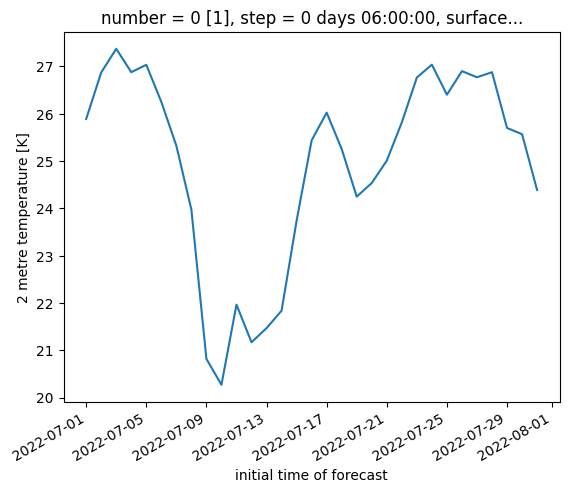

In [70]:
one_dimension_test.plot()